In [1]:
## Research Question and Hypotheses

### Research Question:How do visa approval and rejection rates affect tourist inflow in European countries?
#This study aims to determine whether restrictive visa policies (e.g., high visa rejection rates) correlate with lower tourism numbers, and how additional factors like safety, cost of living, and cultural significance influence this relationship.

### Hypotheses

#Null Hypothesis (H0): There is no significant difference in tourist volumes between countries with high and low visa refusal rates.

#Alternative Hypothesis (H1): Countries with lower visa refusal rates have significantly higher tourist volumes.

### Purpose of Machine Learning and Statistical Testing

#This project uses a combination of statistical and machine learning methods to:
# - Quantify the relationship between visa policies and tourism inflow.
#- Identify whether visa refusal rates can predict tourist volume.
#- Explore how other features (e.g., safety, cost, cultural relevance) impact this relationship.
#- Use clustering techniques to detect patterns or groupings among countries.
#- Validate findings with significance tests (e.g., t-test) to confirm whether observed differences are statistically meaningful.

In [2]:
%pip install --upgrade bottleneck
import pandas as pd

# Load the CSV file
visa_df = pd.read_csv("visadata.csv")
tourism_df = pd.read_csv("destinations.csv", encoding="ISO-8859-1")

# Check it loaded properly
print("Visa Data:")
display(visa_df.head())
print("Destination data:")
tourism_df.head()

Note: you may need to restart the kernel to use updated packages.
Visa Data:


,reporting_year,reporting_state,consulate_country,consulate_country_code,consulate_country_region,consulate_country_income_group,consulate_city,visitor_visa_applications,visitor_visa_issued,visitor_visa_not_issued,visitor_visa_refusal_rate
0,2023,Austria,Albania,ALB,Europe & Central Asia,Upper middle income,TIRANA,73,64,7,0.098592
1,2023,Austria,Algeria,DZA,Middle East & North Africa,Lower middle income,ALGIERS,1953,1009,937,0.481501
2,2023,Austria,Argentina,ARG,Latin America & Caribbean,Upper middle income,BUENOS AIRES,13,13,0,0.000000
3,2023,Austria,Australia,AUS,East Asia & Pacific,High income,CANBERRA,3638,3583,55,0.015118
4,2023,Austria,Azerbaijan,AZE,Europe & Central Asia,Upper middle income,BAKU,2676,2610,62,0.023204


Destination data:


,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Famous Foods,Language,Best Time to Visit,Cost of Living,Safety,Cultural Significance,Description
0,Rome,Lazio,Italy,City,41.902782,12.496366,14 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","The capital city, known for its historical lan...","A hub of ancient history and modern culture, w..."
1,Florence,Tuscany,Italy,City,43.769581,11.255772,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A Renaissance city famous for its art, archite...","Home to world-class museums, including the Uff..."
2,Venice,Veneto,Italy,City,45.435559,12.336196,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A unique city built on canals, known for its g...","An iconic city of water, renowned for romantic..."
3,Milan,Lombardy,Italy,City,45.464643,9.188540,7 million,Euro,Roman Catholic,"Risotto, Ossobuco, Panettone",Italian,Spring (April-May) or Fall (Sept-Oct),High,"Generally safe, but watch out for pickpockets","A fashion capital known for its shopping, muse...","A modern city with an ancient soul, featuring ..."
4,Naples,Campania,Italy,City,40.851330,14.254720,5 million,Euro,Roman Catholic,"Pizza, Pasta, Cannoli",Italian,Spring (April-May) or Fall (Sept-Oct),Medium,"Generally safe, but be aware of pickpockets","A vibrant city known for its delicious food, h...","Famous for pizza, Pompeii, and proximity to th..."


In [3]:
#Clean column names and remove unnecessary rows (if any):
visa_df.columns = visa_df.columns.str.strip()
tourism_df.columns = tourism_df.columns.str.strip()

#check for missing values 
visa_df.isnull().sum()
tourism_df.isnull().sum()


Destination                     0
Region                          0
Country                         0
Category                        0
Latitude                        0
Longitude                       0
Approximate Annual Tourists     0
Currency                        0
Majority Religion               0
Famous Foods                    0
Language                        0
Best Time to Visit              0
Cost of Living                  0
Safety                          0
Cultural Significance           0
Description                    50
dtype: int64

In [4]:
#Standardize country names to help with merging
visa_df['consulate_country'] = visa_df['consulate_country'].str.strip().str.lower()
tourism_df['Country'] = tourism_df['Country'].str.strip().str.lower()


In [5]:
#merge the data
merged_df = pd.merge(
    visa_df, tourism_df,
    how="inner",
    left_on="consulate_country",
    right_on="Country"
)
merged_df.head()

,reporting_year,reporting_state,consulate_country,consulate_country_code,consulate_country_region,consulate_country_income_group,consulate_city,visitor_visa_applications,visitor_visa_issued,visitor_visa_not_issued,...,Approximate Annual Tourists,Currency,Majority Religion,Famous Foods,Language,Best Time to Visit,Cost of Living,Safety,Cultural Significance,Description
0,2023,Austria,germany,DEU,Europe & Central Asia,High income,MUNICH,128,122,3,...,13.5 million,Euro,Protestant,"Currywurst, Bratwurst, Sauerkraut",German,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch for pickpockets",The capital city known for its historical land...,"Famous for the Brandenburg Gate, Berlin Wall, ..."
1,2023,Austria,germany,DEU,Europe & Central Asia,High income,MUNICH,128,122,3,...,10 million,Euro,Protestant,"Weiáwurst, Brezn, Leberkse",German,Spring (April-May) or Fall (Sept-Oct),Medium-high,Generally safe,"A Bavarian city famous for its Oktoberfest, be...","Known for its beer culture, historic Marienpla..."
2,2023,Austria,germany,DEU,Europe & Central Asia,High income,MUNICH,128,122,3,...,7 million,Euro,Protestant,"Frankfurter Kranz, Apfelwein, Grne Soáe",German,Spring (April-May) or Fall (Sept-Oct),High,Generally safe,"A financial center known for its skyscrapers, ...","Home to the European Central Bank, Goethe Hous..."
3,2023,Austria,germany,DEU,Europe & Central Asia,High income,MUNICH,128,122,3,...,5 million,Euro,Protestant,"Klsch, Himmel un d, Sauerbraten",German,Spring (April-May) or Fall (Sept-Oct),Medium,Generally safe,"A historic city on the Rhine, known for its Go...",The Cologne Cathedral is a UNESCO World Herita...
4,2023,Austria,germany,DEU,Europe & Central Asia,High income,MUNICH,128,122,3,...,5 million,Euro,Protestant,"Fischbrtchen, Labskaus, Rote Grtze",German,Spring (April-May) or Fall (Sept-Oct),Medium-high,Generally safe,"A port city known for its harbor, Reeperbahn d...","Hamburg boasts a lively arts scene, modern arc..."


In [6]:
import re

# Copy original merged dataset
model_df = merged_df.copy()

# Convert tourist counts from strings like "14 million" to float
def convert_tourist_count(x):
    if isinstance(x, str):
        x = x.lower().replace(",", "").strip()
        match = re.search(r"(\d+(\.\d+)?)", x)
        if match:
            return float(match.group(1)) * (1_000_000 if "million" in x else 1)
    return x

model_df["Approximate Annual Tourists"] = model_df["Approximate Annual Tourists"].apply(convert_tourist_count)

# Map Safety strings to numeric levels using keyword-based rules
def map_safety(value):
    val = str(value).lower()
    if "restricted access" in val:
        return 1
    elif "conflict" in val or "risks" in val:
        return 2
    elif "crowds" in val or "pickpockets" in val:
        return 3
    elif "generally safe" in val:
        return 4
    else:
        return None

model_df["Safety"] = model_df["Safety"].apply(map_safety)

# Map Cost of Living strings to numeric levels
def map_cost(value):
    val = str(value).lower()
    if "free" in val:
        return 1
    elif "low" in val:
        return 2
    elif "medium" in val:
        return 3
    elif "high" in val or "extremely high" in val:
        return 4
    else:
        return None

model_df["Cost of Living"] = model_df["Cost of Living"].apply(map_cost)

# Ensure numeric conversion (in case of unexpected types)
model_df["visitor_visa_refusal_rate"] = pd.to_numeric(model_df["visitor_visa_refusal_rate"], errors="coerce")
model_df["Safety"] = pd.to_numeric(model_df["Safety"], errors="coerce")
model_df["Cost of Living"] = pd.to_numeric(model_df["Cost of Living"], errors="coerce")
model_df["Approximate Annual Tourists"] = pd.to_numeric(model_df["Approximate Annual Tourists"], errors="coerce")

# Drop rows with missing or invalid values
model_df = model_df.dropna(subset=[
    "visitor_visa_refusal_rate",
    "Safety",
    "Cost of Living",
    "Approximate Annual Tourists"
])

# Check the result
print(" Final model_df shape:", model_df.shape)


 Final model_df shape: (62724, 27)


In [7]:
import re
def convert_tourist_count(x):
    if isinstance(x, str):
        x = x.lower().replace(",", "").strip()
        match = re.search(r"(\d+(\.\d+)?)", x)
        if match:
            number = float(match.group(1))
            # If 'million' is in the string, multiply
            if "million" in x:
                return number * 1_000_000
            else:
                return number  # already numeric
        return None
    return x


In [8]:
merged_df["Approximate Annual Tourists"] = merged_df["Approximate Annual Tourists"].apply(convert_tourist_count)

In [9]:
print(merged_df["Approximate Annual Tourists"].describe())

count    6.835900e+04
mean     3.031470e+06
std      4.794942e+06
min      1.000000e+04
25%      5.000000e+05
50%      1.500000e+06
75%      3.000000e+06
max      3.500000e+07
Name: Approximate Annual Tourists, dtype: float64


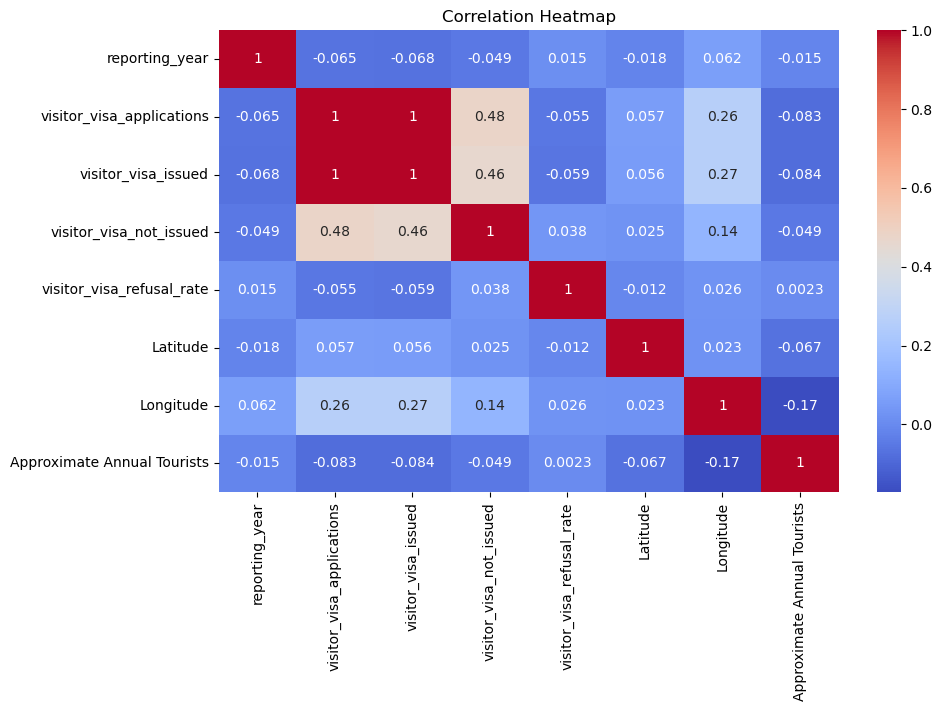

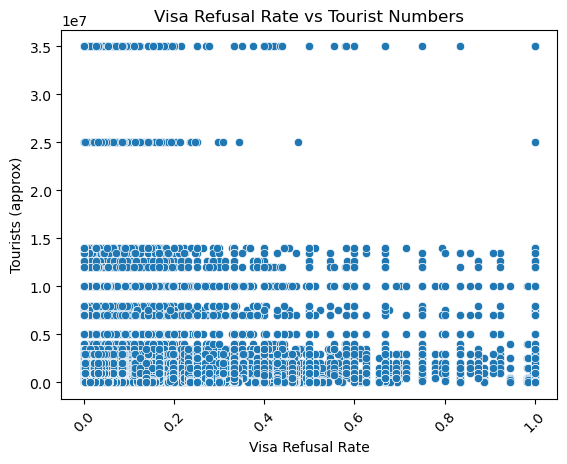

/Users/iremsuozdemir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


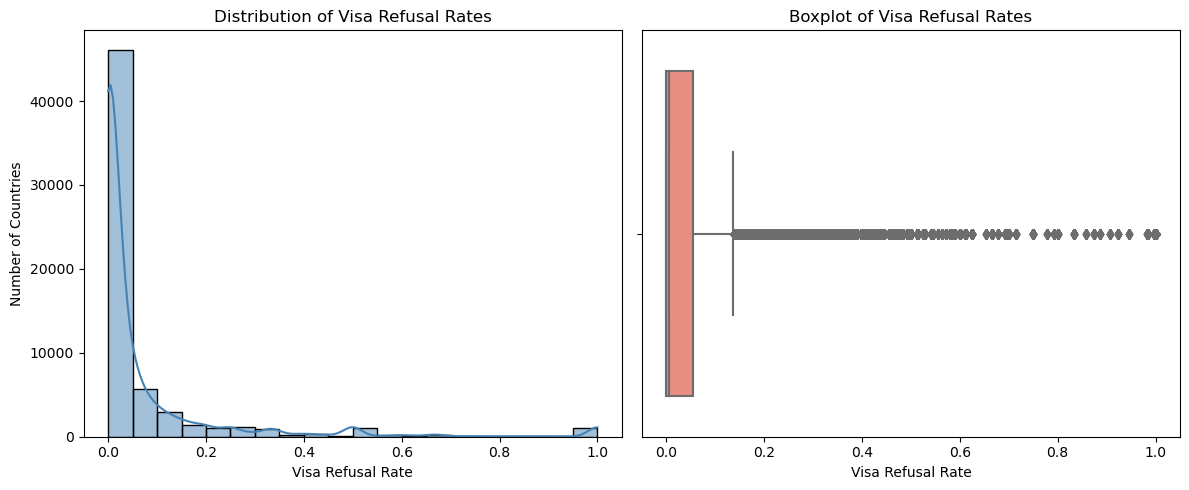

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plot: Visa Rejection Rate vs Tourist Numbers
sns.scatterplot(
    x="visitor_visa_refusal_rate",
    y="Approximate Annual Tourists",
    data=merged_df
)
plt.title("Visa Refusal Rate vs Tourist Numbers")
plt.xlabel("Visa Refusal Rate")
plt.ylabel("Tourists (approx)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
# Histogram of visa refusal rates
plt.subplot(1, 2, 1)
sns.histplot(model_df["visitor_visa_refusal_rate"], bins=20, kde=True, color='steelblue')
plt.title("Distribution of Visa Refusal Rates")
plt.xlabel("Visa Refusal Rate")
plt.ylabel("Number of Countries")

# Boxplot of visa refusal rates
plt.subplot(1, 2, 2)
sns.boxplot(x=model_df["visitor_visa_refusal_rate"], color='salmon')
plt.title("Boxplot of Visa Refusal Rates")
plt.xlabel("Visa Refusal Rate")

plt.tight_layout()
plt.show()



In [11]:
import scipy.stats as stats

# Drop rows where either variable is still missing (if any)
cleaned_df = merged_df.dropna(subset=["visitor_visa_refusal_rate", "Approximate Annual Tourists"])

# Redefine groups using cleaned data
threshold = cleaned_df["visitor_visa_refusal_rate"].median()
group_high = cleaned_df[cleaned_df["visitor_visa_refusal_rate"] > threshold]
group_low = cleaned_df[cleaned_df["visitor_visa_refusal_rate"] <= threshold]

# Run t-test
t_stat, p_value = stats.ttest_ind(
    group_high["Approximate Annual Tourists"],
    group_low["Approximate Annual Tourists"],
    nan_policy='omit'
)
print(f"T-statistic: {t_stat}, P-value: {p_value}")



T-statistic: -17.141222198042385, P-value: 1.03243701295716e-65


Note: you may need to restart the kernel to use updated packages.
Missing Values:
 reporting_year                      0
reporting_state                     0
consulate_country                   0
consulate_country_code              0
consulate_country_region            0
consulate_country_income_group    259
consulate_city                      0
visitor_visa_applications           0
visitor_visa_issued                 0
visitor_visa_not_issued             0
visitor_visa_refusal_rate         990
dtype: int64


/Users/iremsuozdemir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/iremsuozdemir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/iremsuozdemir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/iremsuozdemir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

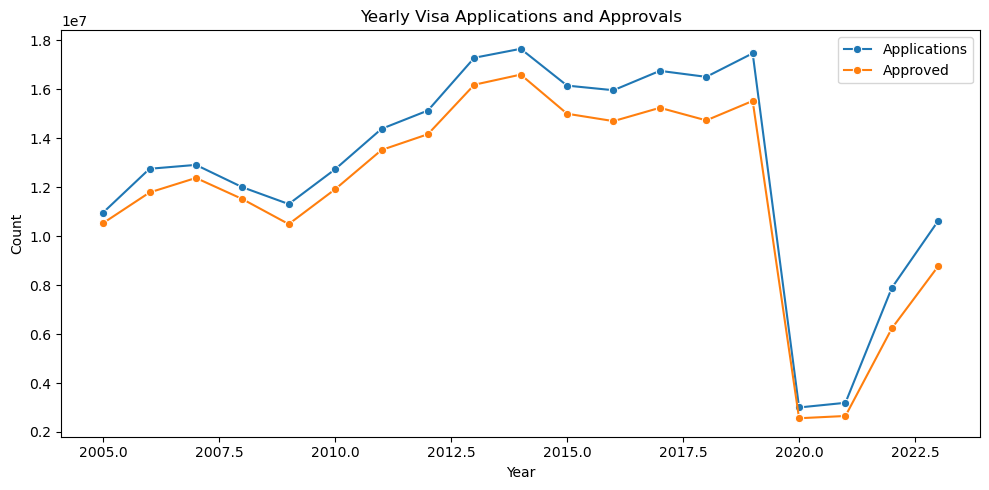

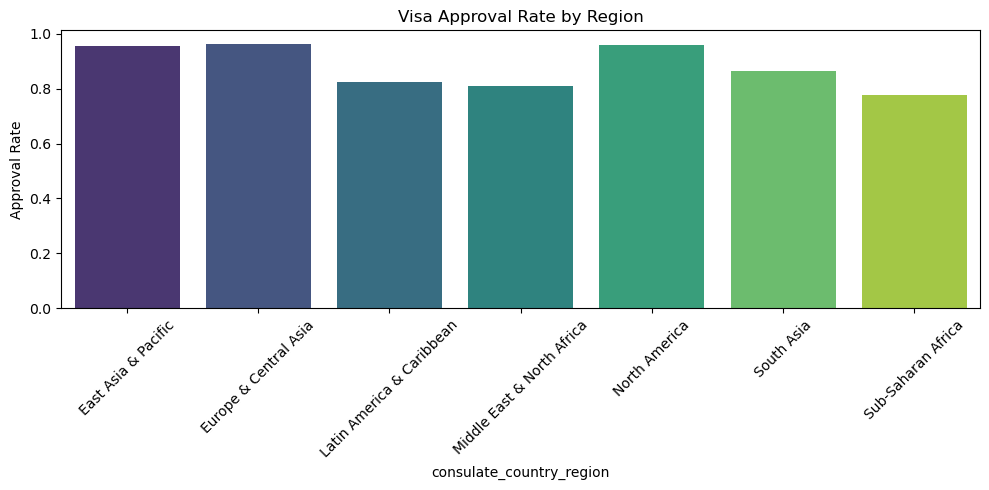

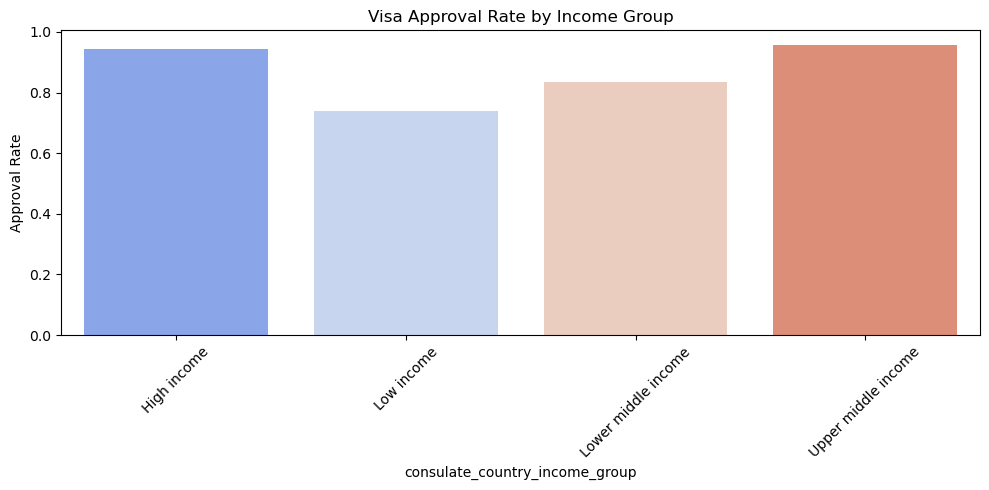

In [12]:
#To complement the earlier findings, we conducted further exploratory analyses on:

#- Yearly trends in visa applications and approvals
#- Regional differences in visa acceptance
#- Approval rates across income groups

#These findings help contextualize the impact of visa policies over time and across different world regions.

%pip install "numpy<2"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load visa dataset
df = pd.read_csv("visadata.csv")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Calculate approval and refusal rates
df['approval_rate'] = df['visitor_visa_issued'] / df['visitor_visa_applications']
df['refusal_rate'] = df['visitor_visa_not_issued'] / df['visitor_visa_applications']

# Yearly trends in visa applications and approvals
yearly_data = df.groupby("reporting_year")[['visitor_visa_applications', 'visitor_visa_issued']].sum()
yearly_data['approval_rate'] = yearly_data['visitor_visa_issued'] / yearly_data['visitor_visa_applications']

# Regional visa approval/refusal rates
region_stats = df.groupby("consulate_country_region")[['visitor_visa_applications', 'visitor_visa_issued', 'visitor_visa_not_issued']].sum()
region_stats['approval_rate'] = region_stats['visitor_visa_issued'] / region_stats['visitor_visa_applications']
region_stats['refusal_rate'] = region_stats['visitor_visa_not_issued'] / region_stats['visitor_visa_applications']

# Income group visa approval rates
income_stats = df.groupby("consulate_country_income_group")[['visitor_visa_applications', 'visitor_visa_issued']].sum()
income_stats['approval_rate'] = income_stats['visitor_visa_issued'] / income_stats['visitor_visa_applications']

# Visualization 1: Yearly visa applications and approvals
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_data, x=yearly_data.index, y="visitor_visa_applications", marker="o", label="Applications")
sns.lineplot(data=yearly_data, x=yearly_data.index, y="visitor_visa_issued", marker="o", label="Approved")
plt.title("Yearly Visa Applications and Approvals")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 2: Approval rates by region
plt.figure(figsize=(10, 5))
sns.barplot(x=region_stats.index, y=region_stats['approval_rate'], palette='viridis')
plt.xticks(rotation=45)
plt.title("Visa Approval Rate by Region")
plt.ylabel("Approval Rate")
plt.tight_layout()
plt.show()

# Visualization 3: Approval rates by income group
plt.figure(figsize=(10, 5))
sns.barplot(x=income_stats.index, y=income_stats['approval_rate'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Visa Approval Rate by Income Group")
plt.ylabel("Approval Rate")
plt.tight_layout()
plt.show()


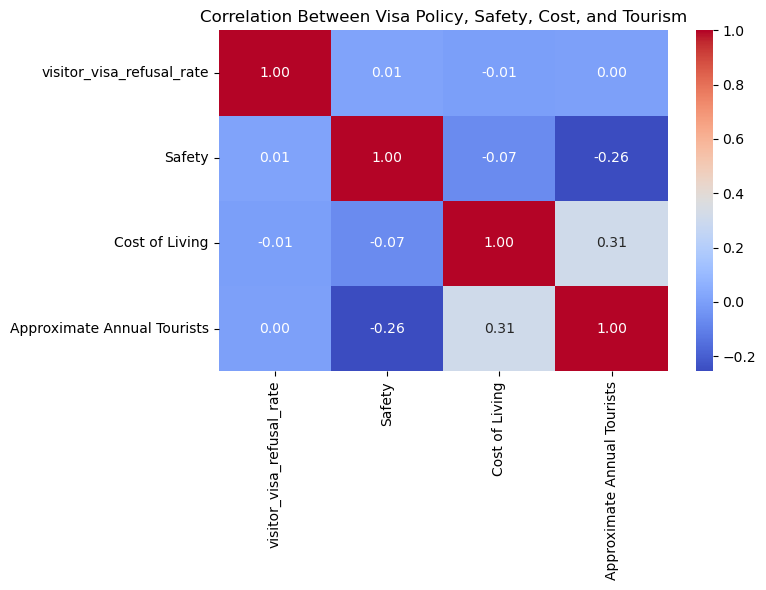

In [13]:
corr_vars = ["visitor_visa_refusal_rate", "Safety", "Cost of Living", "Approximate Annual Tourists"]

plt.figure(figsize=(8, 6))
sns.heatmap(model_df[corr_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Visa Policy, Safety, Cost, and Tourism")
plt.tight_layout()
plt.show()


/var/folders/9t/srqn9kdx2nb0fp8h3y2rkd140000gn/T/ipykernel_78825/3340257812.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = model_df.groupby("refusal_bin").agg({


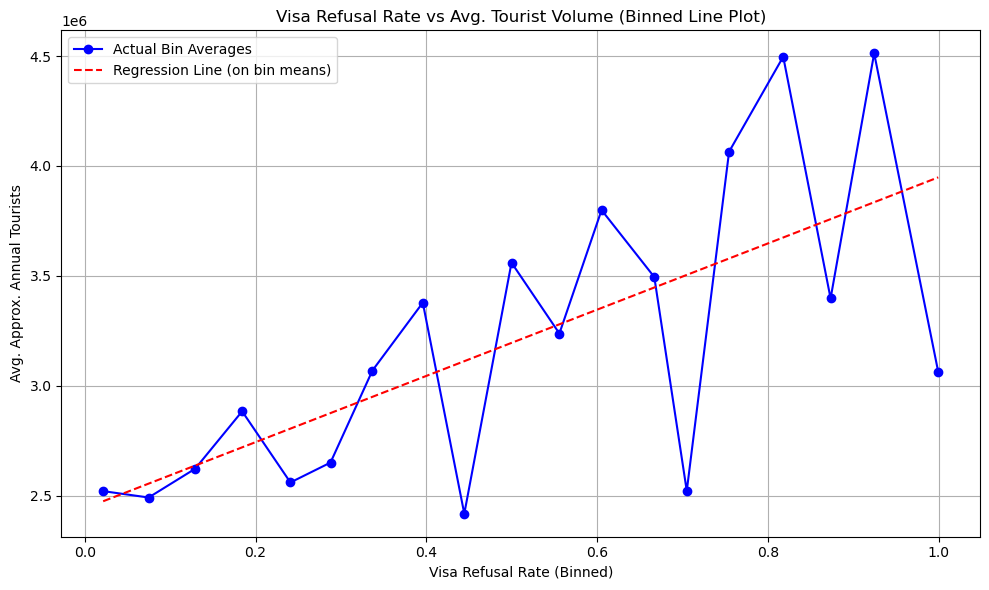

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepare bins of visa refusal rate
model_df["refusal_bin"] = pd.cut(model_df["visitor_visa_refusal_rate"], bins=np.linspace(0, 1, 20))
binned = model_df.groupby("refusal_bin").agg({
    "visitor_visa_refusal_rate": "mean",
    "Approximate Annual Tourists": "mean"
}).dropna()

# Fit regression on binned means
X_binned = binned[["visitor_visa_refusal_rate"]]
y_binned = binned["Approximate Annual Tourists"]
reg_binned = LinearRegression()
reg_binned.fit(X_binned, y_binned)
y_pred_binned = reg_binned.predict(X_binned)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(X_binned, y_binned, marker='o', label='Actual Bin Averages', color='blue')
plt.plot(X_binned, y_pred_binned, linestyle='--', color='red', label='Regression Line (on bin means)')
plt.title("Visa Refusal Rate vs Avg. Tourist Volume (Binned Line Plot)")
plt.xlabel("Visa Refusal Rate (Binned)")
plt.ylabel("Avg. Approx. Annual Tourists")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
print("Unique Safety values:\n", merged_df["Safety"].dropna().unique())
print("\nUnique Cost of Living values:\n", merged_df["Cost of Living"].dropna().unique())


Unique Safety values:
 ['Generally safe, but watch for pickpockets' 'Generally safe'
 'Generally safe, but be aware of pickpockets'
 'Generally safe, but watch out for pickpockets'
 'Generally safe, but be aware of crowds'
 'Generally safe, but be aware of ongoing conflict'
 'Generally safe, but be aware of potential risks' 'Restricted access']

Unique Cost of Living values:
 ['Medium-high' 'High' 'Medium' 'Free' 'Extremely high' 'Varies']


In [16]:
merged_df.to_csv("merged_df.csv", index=False)


In [17]:
import pandas as pd
import numpy as np
import re

# Load your merged dataset
merged_df = pd.read_csv("merged_df.csv")  # make sure the path is correct

# === 1. Convert Tourist Count to Numeric ===
def convert_tourist_count(x):
    if isinstance(x, str):
        x = x.lower().replace(",", "").strip()
        match = re.search(r"(\d+(\.\d+)?)", x)
        if match:
            return float(match.group(1)) * (1_000_000 if "million" in x else 1)
    return x

merged_df["Approximate Annual Tourists"] = merged_df["Approximate Annual Tourists"].apply(convert_tourist_count)

# === 2. Map Ordinal Variables ===
safety_map = {
    "generally safe": 2,
    "generally safe, but watch for pickpockets": 2,
    "generally safe, but be aware of pickpockets": 2,
    "generally safe, but watch out for pickpockets": 2,
    "generally safe, but be aware of crowds": 2,
    "generally safe, but be aware of ongoing conflict": 1,
    "generally safe, but be aware of potential risks": 1,
    "restricted access": 0
}
merged_df["Safety"] = merged_df["Safety"].astype(str).str.strip().str.lower().map(safety_map)

cost_map = {
    "low": 1,
    "medium": 2,
    "medium-high": 3,
    "high": 4,
    "free": 0,
    "extremely high": 5,
    "varies": 2  # Treat as medium by default
}
merged_df["Cost of Living"] = merged_df["Cost of Living"].astype(str).str.strip().str.lower().map(cost_map)

# === 3. Quantify Cultural Significance (word count of 'Description') ===
merged_df["Cultural Score"] = merged_df["Description"].astype(str).apply(lambda x: len(x.split()))

# === 4. One-hot Encode Category and Income Group (if present) ===
features_to_encode = []
if "Category" in merged_df.columns:
    features_to_encode.append("Category")
if "consulate_country_income_group" in merged_df.columns:
    features_to_encode.append("consulate_country_income_group")

merged_df = pd.get_dummies(merged_df, columns=features_to_encode, drop_first=True)

# === 5. Drop NaNs from critical columns ===
features_used = [
    "visitor_visa_refusal_rate", 
    "Safety", 
    "Cost of Living", 
    "Cultural Score", 
    "Approximate Annual Tourists"
]
# Add one-hot columns to the list
features_used += [col for col in merged_df.columns if col.startswith("Category_") or col.startswith("consulate_country_income_group_")]

model_df = merged_df[features_used].dropna()

print(" Final shape of model-ready data:", model_df.shape)
model_df.head()


 Final shape of model-ready data: (62737, 48)


,visitor_visa_refusal_rate,Safety,Cost of Living,Cultural Score,Approximate Annual Tourists,Category_Archaeological Site,Category_Beach,Category_Castle,Category_City,Category_Cliff,...,Category_Spa Town,Category_Square,Category_Street,Category_Theme Park,Category_Town,Category_Valley,Category_Village,Category_Waterfall,consulate_country_income_group_Lower middle income,consulate_country_income_group_Upper middle income
0,0.024,2,3,11,13500000.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.024,2,3,11,10000000.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0.024,2,4,12,7000000.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0.024,2,2,16,5000000.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0.024,2,3,11,5000000.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error

# === Prepare Data ===
# Drop rows with missing target
model_df = model_df.dropna(subset=["Approximate Annual Tourists"])

# Drop interval-based column if it exists (like 'refusal_bin')
if "refusal_bin" in model_df.columns:
    model_df = model_df.drop(columns=["refusal_bin"])

# Separate features and target
X = model_df.drop(columns=["Approximate Annual Tourists"])
X = X.select_dtypes(include=["number"])  # keep only numeric columns
y = model_df["Approximate Annual Tourists"]

# === Regression ===
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("📊 R² Score:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
print("📉 RMSE:", rmse)

# === Clustering ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
model_df["Cluster"] = kmeans.fit_predict(X_scaled)




📊 R² Score: 0.1378419211971782
📉 RMSE: 4495208.277597132


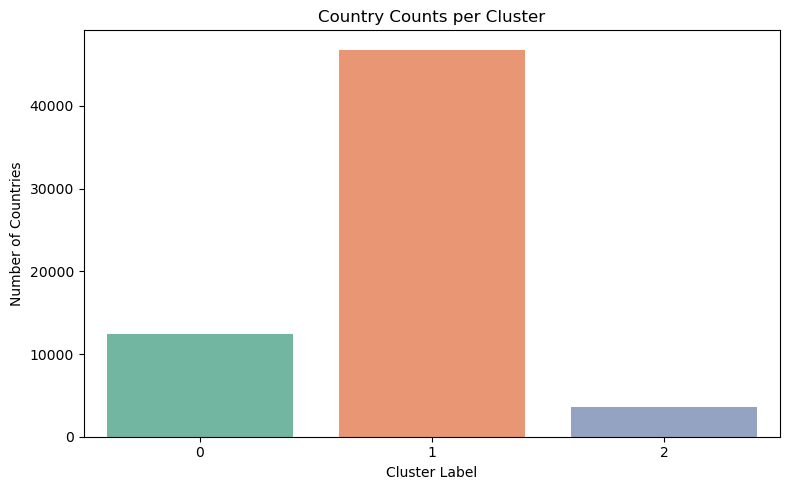

In [19]:
# === Visualization 1: Cluster distribution bar plot ===
plt.figure(figsize=(8, 5))
sns.countplot(x="Cluster", data=model_df, palette="Set2")
plt.title("Country Counts per Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()

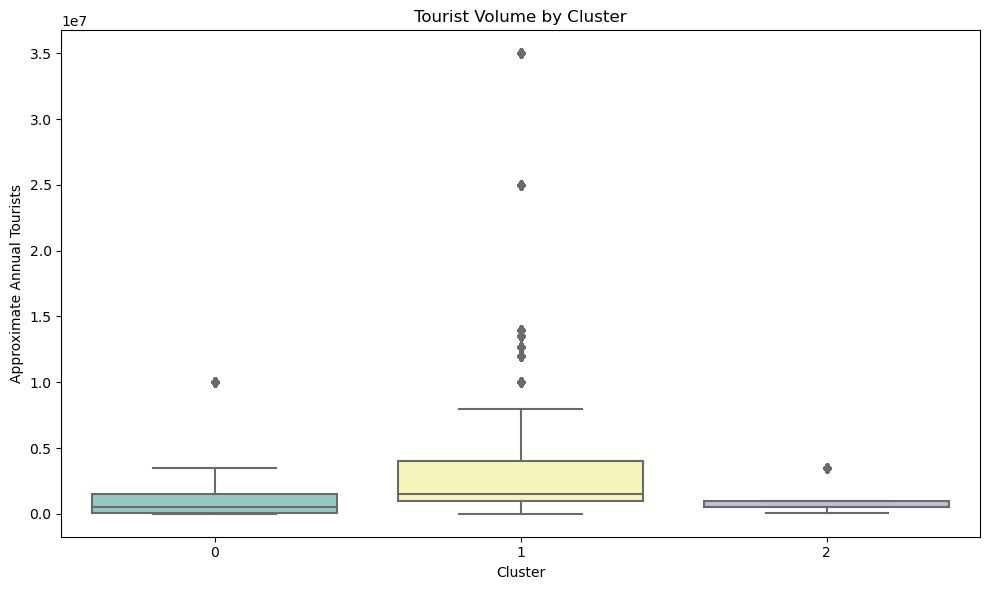

In [20]:
# === Visualization 2: Clustered Boxplot ===
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Approximate Annual Tourists", data=model_df, palette="Set3")
plt.title("Tourist Volume by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Approximate Annual Tourists")
plt.tight_layout()
plt.show()


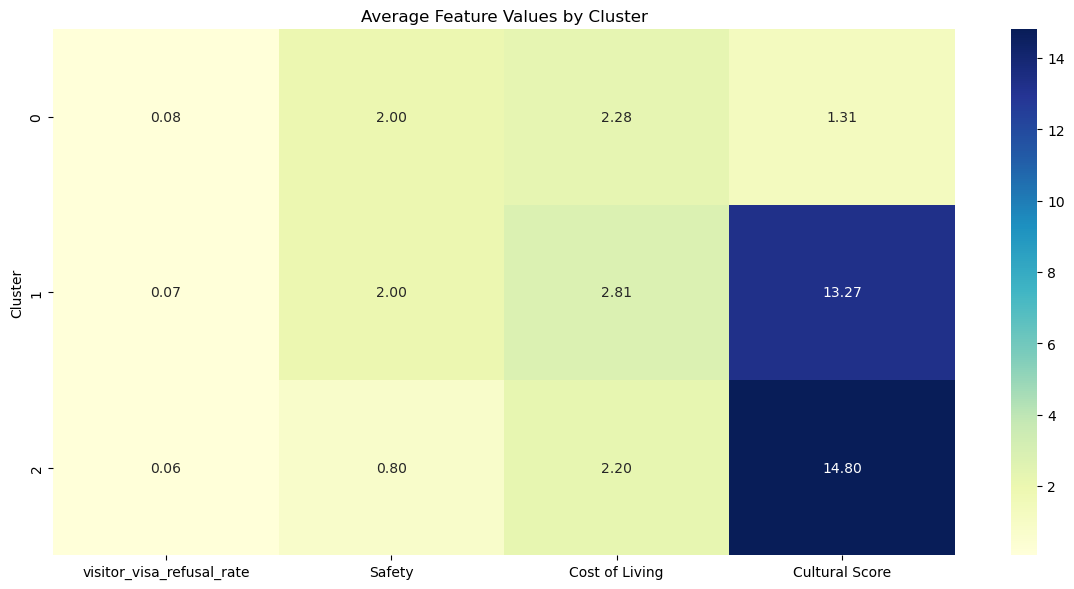

In [21]:
# === Visualization 3: Cluster Heatmap of Feature Averages ===
cluster_means = model_df.groupby("Cluster")[X.columns].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Feature Values by Cluster")
plt.tight_layout()
plt.show()

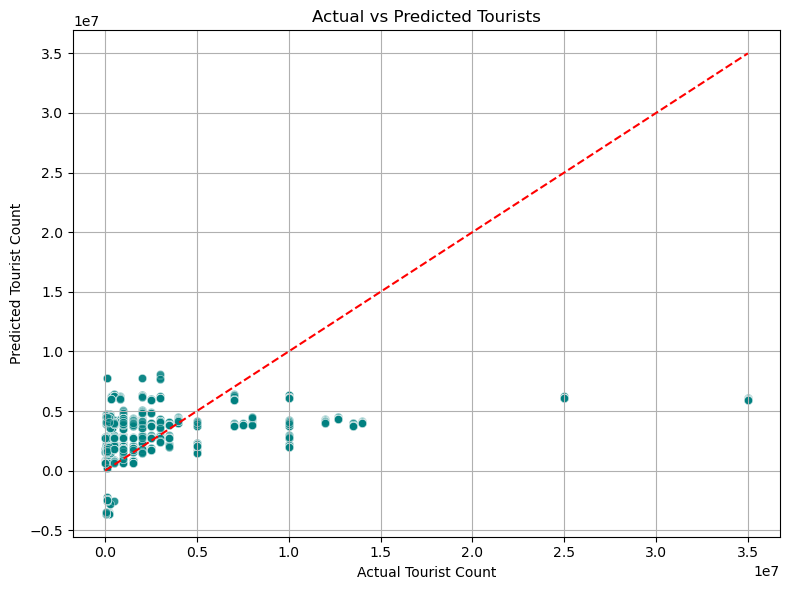

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Tourist Count")
plt.ylabel("Predicted Tourist Count")
plt.title("Actual vs Predicted Tourists")
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/iremsuozdemir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


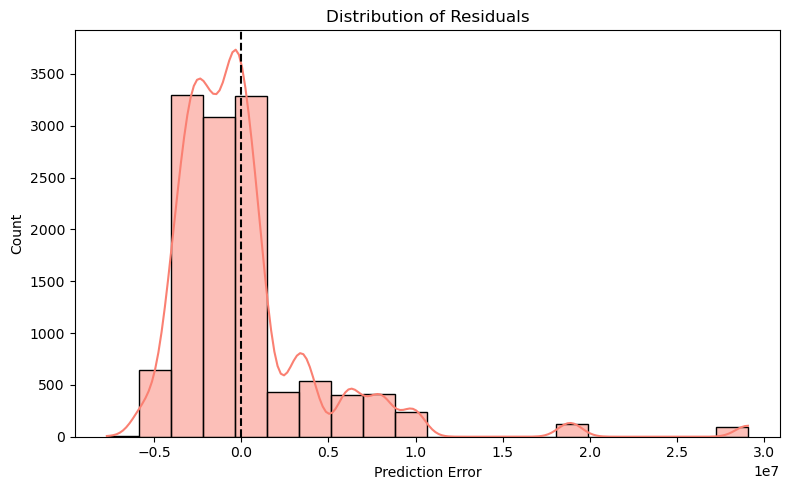

In [23]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color="salmon")
plt.axvline(0, color="black", linestyle="--")
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()


📊 R² Score (Polynomial): 0.17596427455733232
📉 RMSE (Polynomial): 4394701.561881151


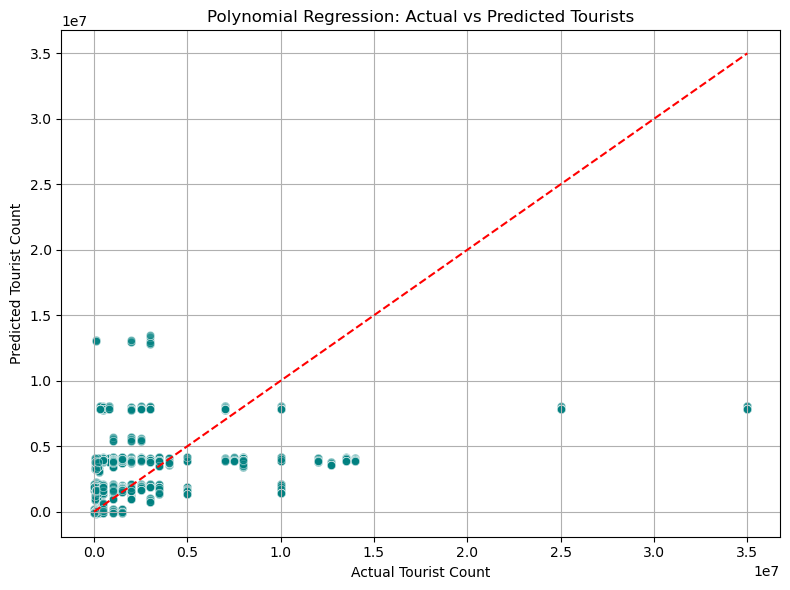

/Users/iremsuozdemir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


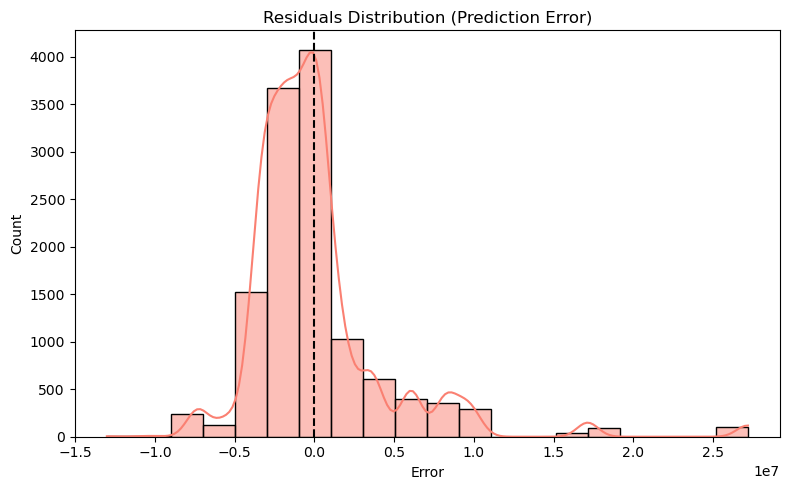

In [24]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 R² Score (Polynomial):", r2)
print("📉 RMSE (Polynomial):", rmse)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Tourist Count")
plt.ylabel("Predicted Tourist Count")
plt.title("Polynomial Regression: Actual vs Predicted Tourists")
plt.grid(True)
plt.tight_layout()
plt.show()


residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color="salmon")
plt.axvline(0, color="black", linestyle="--")
plt.title("Residuals Distribution (Prediction Error)")
plt.xlabel("Error")
plt.tight_layout()
plt.show()



📊 R² Score (Random Forest): 0.440472781616292
📉 RMSE (Random Forest): 3621320.612553934


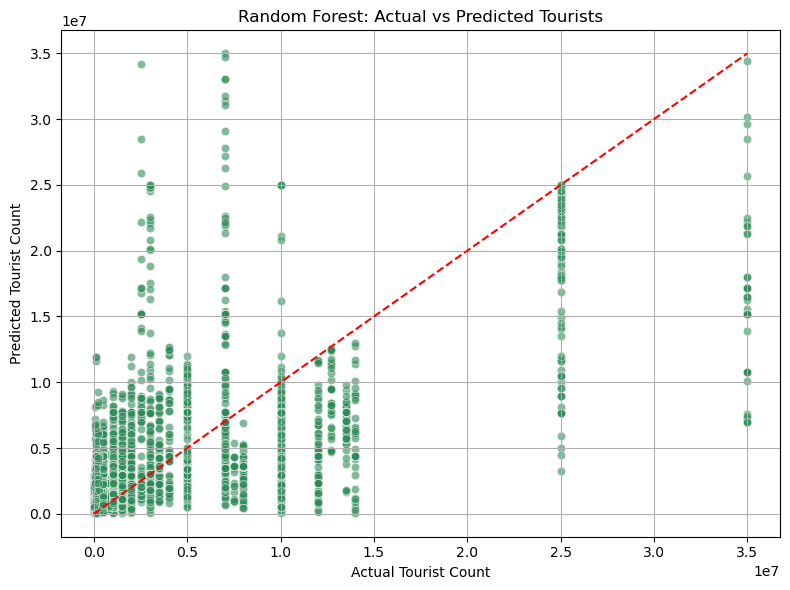

/Users/iremsuozdemir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


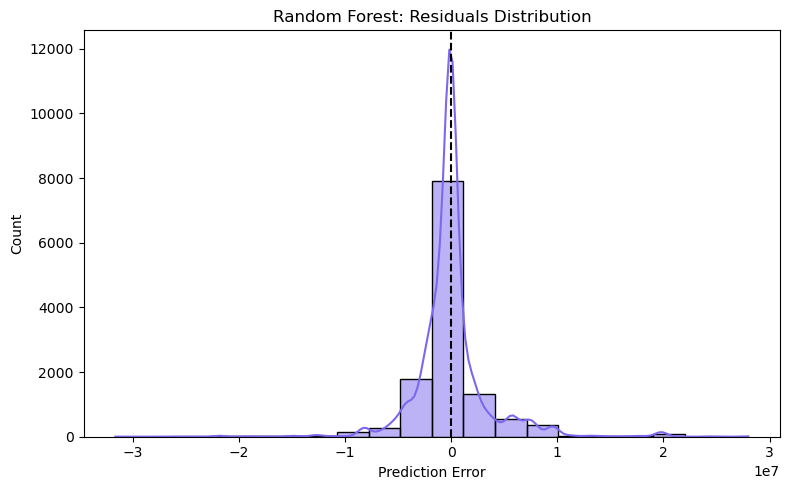

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("📊 R² Score (Random Forest):", r2_rf)
print("📉 RMSE (Random Forest):", rmse_rf)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='seagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Tourist Count")
plt.ylabel("Predicted Tourist Count")
plt.title("Random Forest: Actual vs Predicted Tourists")
plt.grid(True)
plt.tight_layout()
plt.show()

residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.histplot(residuals_rf, bins=20, kde=True, color="mediumslateblue")
plt.axvline(0, color="black", linestyle="--")
plt.title("Random Forest: Residuals Distribution")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()


